# Exercise session 3: Duality

### Exercise 1: Duality in linear programming

|  | Potatoes | Sugar beets | Cotton |
| --- | --- | --- | --- |
| Expected returns ($/acre) | $1,800$ | $2,500$ | $2,000$ |
| Fertiliser use (kg/acre) | $200$ | $120$ | $60$ |
| Water use ($m^3$/acre) | $3,000$ | $5,000$ | $4,000$ |

**Task 1a**: Linear program

$$
\max_x{c^T x} \text{ subject to } Ax \leq b, x \geq 0
$$

In [1]:
import numpy as np

A = np.array([
    [1, 1, 1],           # acres
    [200, 120, 60],      # fertilizer
    [3000, 5000, 4000],  # water
])
b = np.array([110, 20_000, 360_001])  # budget (acres, fertilizer, water)
c = np.array([1800, 2500, 2000])  # expected returns (potatoes, sugar beets, cotton)

**Task 1e**:

In [2]:
c_dual = b
A_dual = -A.T
b_dual = -c

**Task 1f:**

Note that the default bounds for SciPy's `linprog` make sure the variables are positive. Since this is the case for our two optimization problems, we do not need to add them.

In [3]:
from scipy.optimize import linprog

sol = linprog(c=-c, A_ub=A, b_ub=b)
x = sol.x
print("Primal solution:", x)
print("Multipliers:", sol.ineqlin.marginals)
print("Value:", -sol.fun)

Primal solution: [90.9997 11.0007  7.9996]
Multipliers: [-270.     -1.5    -0.41]
Value: 207300.41


In [4]:
sol_dual = linprog(c=c_dual, A_ub=A_dual, b_ub=b_dual)
y = sol_dual.x
print("Dual solution:", y)
print("Multipliers:", sol_dual.ineqlin.marginals)
print("Value:", sol_dual.fun)

Dual solution: [270.     1.5    0.41]
Multipliers: [-90.9997 -11.0007  -7.9996]
Value: 207300.41000000003


In [5]:
print("""You should plant {} acres of potatoes,
{} acres of sugar beets,
and {} acres of cotton.
The total returns are €{:,.2f}.""".format(*x, -sol.fun))

You should plant 90.99969999999999 acres of potatoes,
11.000700000000009 acres of sugar beets,
and 7.999600000000002 acres of cotton.
The total returns are €207,300.41.


**Task 1g:**

In [6]:
assert y[2] > 1e-8
print("""The constraint that limits the amount of water is active, because the
corresponding dual variable is nonzero.\n""")

assert y[2] > 0.3
print(f"""You should buy more water for €0.30/m³, because the dual variable
corresponding to the water constraint is €{y[2]}/m³ > €0.30/m³.
This indicates that by increasing the water budget by a small quantity of
dw m³, the expected returns will increase by €{y[2]}×dw,
which is greater than the cost of the water.\n""")

print(y * [0.01, 1, 1])
assert 0.01 * y[0] > y[1] > y[2]
print("Adding 0.01 acres of land has the largest influence on the expected returns.")

The constraint that limits the amount of water is active, because the
corresponding dual variable is nonzero.

You should buy more water for €0.30/m³, because the dual variable
corresponding to the water constraint is €0.4100000000000001/m³ > €0.30/m³.
This indicates that by increasing the water budget by a small quantity of
dw m³, the expected returns will increase by €0.4100000000000001×dw,
which is greater than the cost of the water.

[2.7  1.5  0.41]
Adding 0.01 acres of land has the largest influence on the expected returns.


### Exercise 2: Duality in nonlinear programming

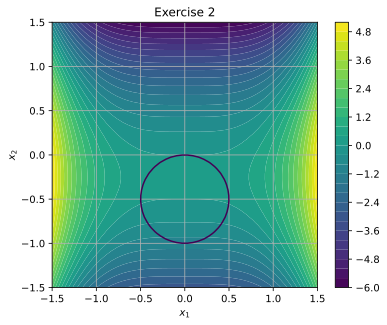

In [7]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
f = np.vectorize(lambda x1, x2: x1**4 - 2 * x2**2 - x2)
g = np.vectorize(lambda x1, x2: x1**2 + x2**2 + x2)

plt.contourf(X1, X2, f(X1, X2), 32)
plt.colorbar()
plt.contour(X1, X2, g(X1, X2), [0])
plt.grid()
plt.gca().set_aspect('equal')
plt.title("Exercise 2")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()
